In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()
df.describe()
df.isnull().sum()
df['region'].value_counts()
df['smoker'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: >

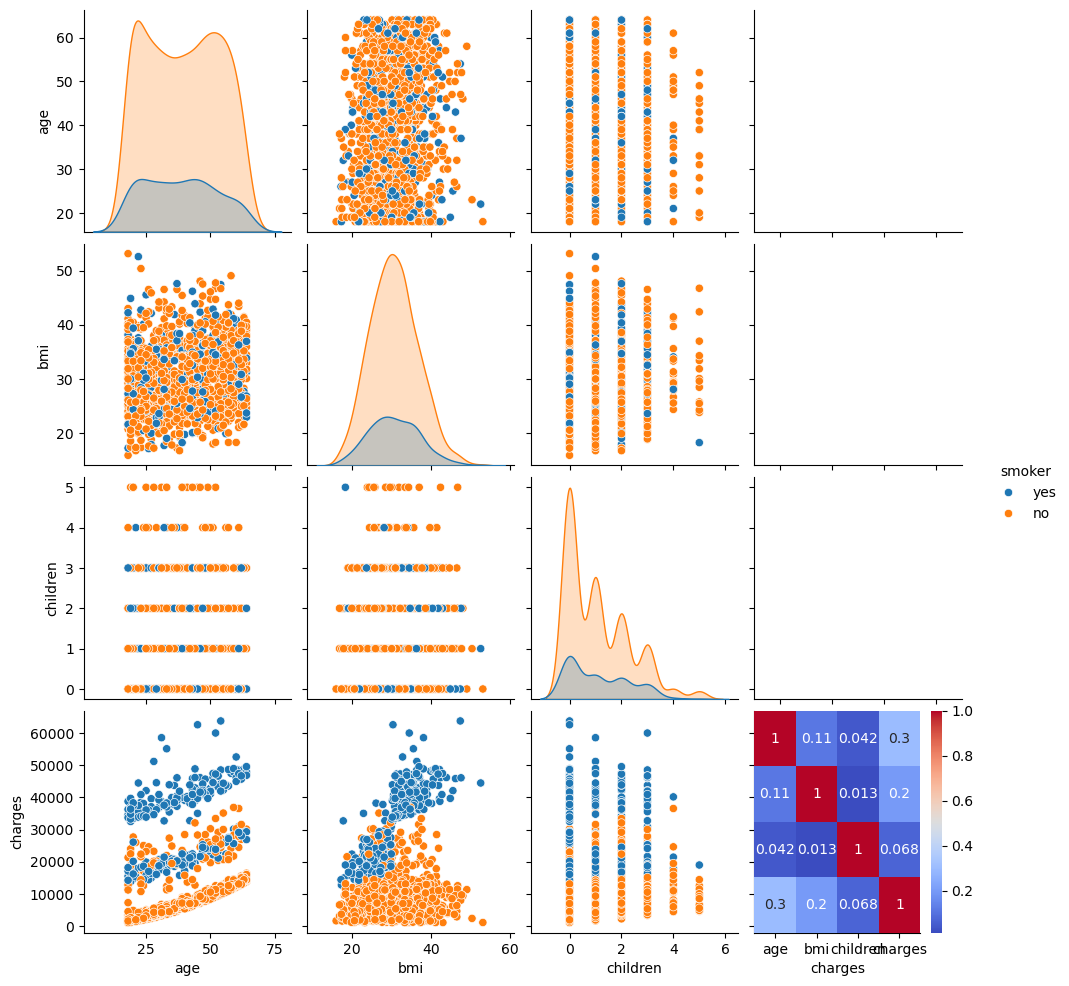

In [5]:
sns.pairplot(df, hue='smoker')
sns.boxplot(x='smoker', y='charges', data=df)
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')

In [6]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Check new columns
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [7]:
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("🔹 Linear Regression")
print("  R² Score:", r2_score(y_test, y_pred_lr))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print()

# 2. Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("🔹 Gradient Boosting Regressor")
print("  R² Score:", r2_score(y_test, y_pred_gb))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

🔹 Linear Regression
  R² Score: 0.7835929767120723
  RMSE: 5796.2846592762735

🔹 Gradient Boosting Regressor
  R² Score: 0.8792571359795264
  RMSE: 4329.570010504765


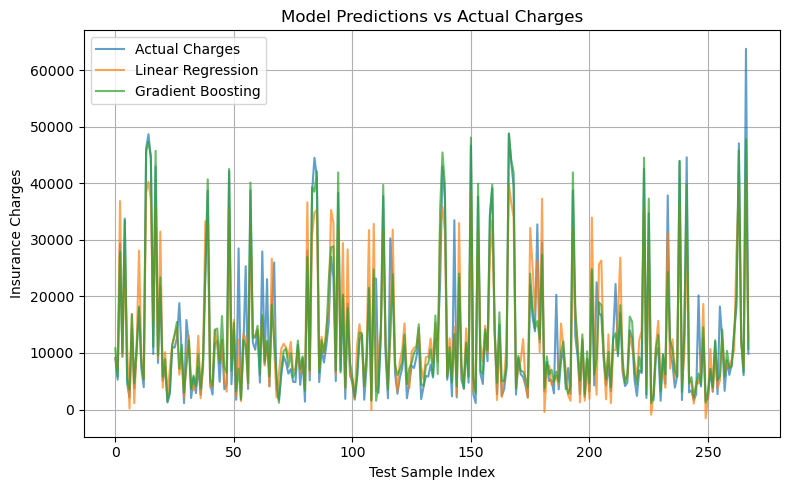

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label='Actual Charges', alpha=0.7)
plt.plot(y_pred_lr, label='Linear Regression', alpha=0.7)
plt.plot(y_pred_gb, label='Gradient Boosting', alpha=0.7)
plt.legend()
plt.title("Model Predictions vs Actual Charges")
plt.xlabel("Test Sample Index")
plt.ylabel("Insurance Charges")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
example = pd.DataFrame({
    'age': [40],
    'bmi': [28],
    'children': [2],
    'sex_male': [1],
    'smoker_yes': [0],
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})

predicted_charge = model.predict(example)
print("Predicted Insurance Charge:", predicted_charge[0])

Predicted Insurance Charge: 7960.502216329829
